In [1]:
#tool box
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

#stylin
plt.style.use('seaborn-darkgrid')

#import the data
pd.read_excel('complete_carb_system_ex.xlsx')
data=pd.read_excel('complete_carb_system_ex.xlsx')


/Users/oliviawren/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [2]:
#convert all units to µM/L
tmp_data=[]
for i,d in data.iterrows():
    if d['DIC_units']=='mg C/L':
        tmp_data.append((d['DIC']/12.011)*1000)
    else:
        tmp_data.append(np.nan)
        
tmp_data=np.array(tmp_data)
data['DIC_trans']=tmp_data.astype(float)

In [3]:
#converting pCO2 units to uatm
pCO2_data=[]
for i,d in data.iterrows():
    if d['CO2_units']=='log(pCO2)':
        pCO2_data.append((10**(d['CO2']))*1000)
    else:
        pCO2_data.append(np.nan)
        
pCO2_data=np.array(pCO2_data)
data['pCO2_trans']=pCO2_data.astype(float)

In [4]:
import numpy as np
import pandas as pd
import xarray
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'xarray'

In [ ]:
# define input conditions; DIC and Alk
kwargs = dict(
    par1 = data['pCO2_trans'],
    par1_type = 4, 
    par2 = data['DIC_trans'],
    par2_type = 2 
)
print("Conditions have been defined: pCO2 and DIC")

In [ ]:
# Import PyCO2SYS
import PyCO2SYS as pyco2

# Run PyCO2SYS
results = pyco2.sys(**kwargs)

# Extract and print out the results
# print(results['pH'])
# print(np.array(data['pH']))

In [ ]:
# define input conditions; DIC and HCO3
kwargs2 = dict(
    par1 = data['HCO3'],
    par1_type = 6, 
    par2 = data['DIC_trans'],
    par2_type = 2 
)
print("Conditions round 2 have been defined: HCO3 and DIC")

In [5]:
# Import PyCO2SYS
import PyCO2SYS as pyco2

# Run PyCO2SYS
results2 = pyco2.sys(**kwargs2)

# Extract and print out the results

ModuleNotFoundError: No module named 'PyCO2SYS'

In [20]:
# define input conditions; pH and HCO3
kwargs3 = dict(
    par1 = data['HCO3'],
    par1_type = 6, 
    par2 = data['pH'],
    par2_type = 3 
)
print("Conditions round 3 have been defined: HCO3 and pH")

Conditions round 3 have been defined: HCO3 and pH


In [21]:
# Import PyCO2SYS
import PyCO2SYS as pyco2

# Run PyCO2SYS
results3 = pyco2.sys(**kwargs3)
# print(np.array(data['pCO2_trans']))
# print(results3['pCO2'])

In [22]:
# define input conditions; pH and HCO3
kwargs4 = dict(
    par1 = data['CO3'],
    par1_type = 7, 
    par2 = data['pH'],
    par2_type = 3 
)
print("Conditions round 4 have been defined: CO3 and pH")

Conditions round 4 have been defined: CO3 and pH


In [23]:
# Import PyCO2SYS
import PyCO2SYS as pyco2

# Run PyCO2SYS
results4 = pyco2.sys(**kwargs3)
# print(np.array(data['pCO2_trans']))
# print(results3['pCO2'])

In [24]:
# define input conditions; pH and HCO3
kwargs4 = dict(
    par1 = data['CO3'],
    par1_type = 7, 
    par2 = data['HCO3'],
    par2_type = 6 
)
print("Conditions round 5 have been defined: CO3 and HCO3")

Conditions round 5 have been defined: CO3 and HCO3


In [46]:
# Import PyCO2SYS
import PyCO2SYS as pyco2

# Run PyCO2SYS
results5 = pyco2.sys(**kwargs3)
# print(np.array(data['pCO2_trans']))
# print(results3['pCO2'])
print(results5['pH'])
print(data['pH'])

[ 7.96  7.96  7.8   8.53  8.15  8.28  8.32  7.98  7.54  8.    7.28  8.54
  6.48  8.21  7.57  8.11  7.54  6.75  8.5   7.67  7.2   7.53  7.94  8.8
   nan  8.42  9.35  8.51  7.55  8.23  7.74 10.2   7.8   8.47  8.2   7.43
  7.    8.18  6.8   8.46  7.13  6.1   6.25  6.26  8.1   6.15  6.96  6.65
  7.44  6.41  8.05]
0      7.96
1      7.96
2      7.80
3      8.53
4      8.15
5      8.28
6      8.32
7      7.98
8      7.54
9      8.00
10     7.28
11     8.54
12     6.48
13     8.21
14     7.57
15     8.11
16     7.54
17     6.75
18     8.50
19     7.67
20     7.20
21     7.53
22     7.94
23     8.80
24      NaN
25     8.42
26     9.35
27     8.51
28     7.55
29     8.23
30     7.74
31    10.20
32     7.80
33     8.47
34     8.20
35     7.43
36     7.00
37     8.18
38     6.80
39     8.46
40     7.13
41     6.10
42     6.25
43     6.26
44     8.10
45     6.15
46     6.96
47     6.65
48     7.44
49     6.41
50     8.05
Name: pH, dtype: float64


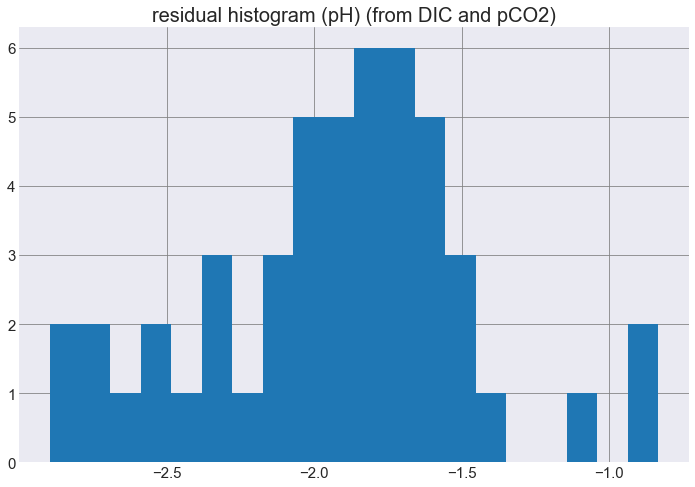

In [26]:
#residual for ph_pred
r_ph = data['pH'] - results['pH']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_ph,bins=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('',fontsize=18)
plt.title('residual histogram (pH) (from DIC and pCO2)', fontsize=20)
plt.grid(color='grey')


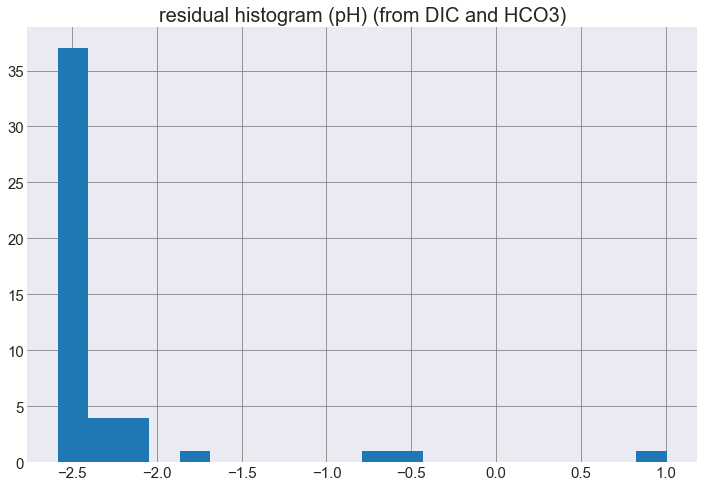

In [27]:
#residual for ph_pred
r_ph_2 = data['pH'] - results2['pH']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_ph_2,bins=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('',fontsize=18)
plt.title('residual histogram (pH) (from DIC and HCO3)', fontsize=20)
plt.grid(color='grey')


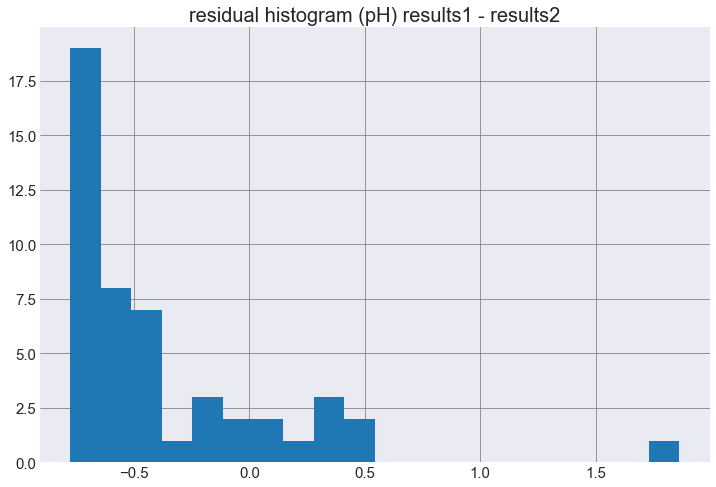

In [28]:
#residual for ph_pred
r_ph_3 = results['pH'] - results2['pH']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_ph_3,bins=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('',fontsize=18)
plt.title('residual histogram (pH) results1 - results2', fontsize=20)
plt.grid(color='grey')


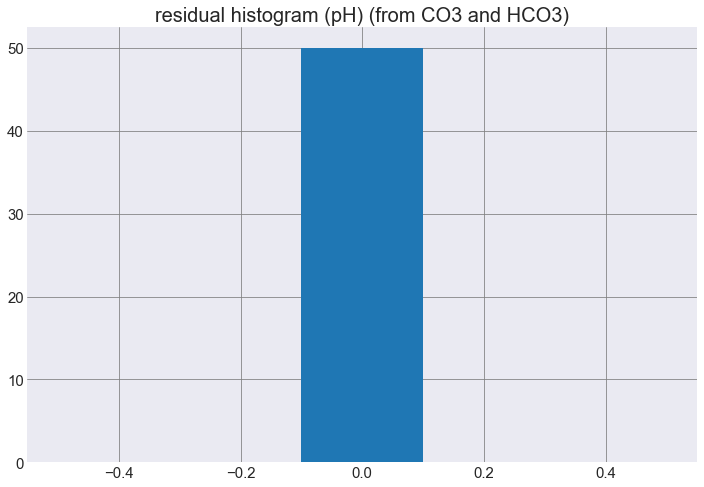

In [43]:
#residual for ph_pred
r_ph_4 = data['pH'] - results5['pH']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_ph_4,bins=5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('',fontsize=18)
plt.title('residual histogram (pH) (from CO3 and HCO3)', fontsize=20)
plt.grid(color='grey')

In [30]:
#calculate d13C_pred

T=25    #degree C
S=35    #PSS
TK = T + 273.15 
DIC=np.array(data['DIC_trans'])

K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))


H=10**(-results5['pH'])

#DIC concentrations calculated from pH
HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
#set d13C for DIC components
CO2aq=-9
CO3=-2
HCO3=0

#calculate d13C_DIC from DIC component concentrations

d13C_DIC_pred = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3
data['d13C_DIC_pred']=d13C_DIC_pred.astype(float)

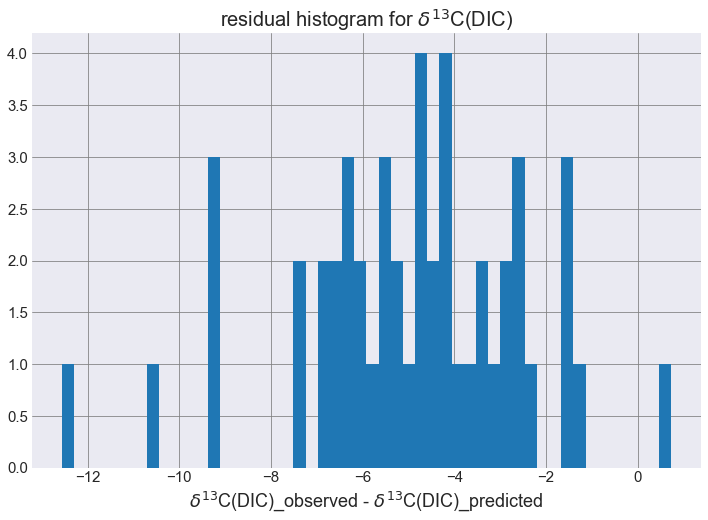

In [41]:
r = np.array(data['d13C_DIC']) - np.array(data['d13C_DIC_pred'])

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r,bins=50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('',fontsize=18)
plt.xlabel('$\delta^{13}$C(DIC)_observed - $\delta^{13}$C(DIC)_predicted',fontsize=18)
plt.title('residual histogram for $\delta^{13}$C(DIC)', fontsize=20)
plt.grid(color='grey')


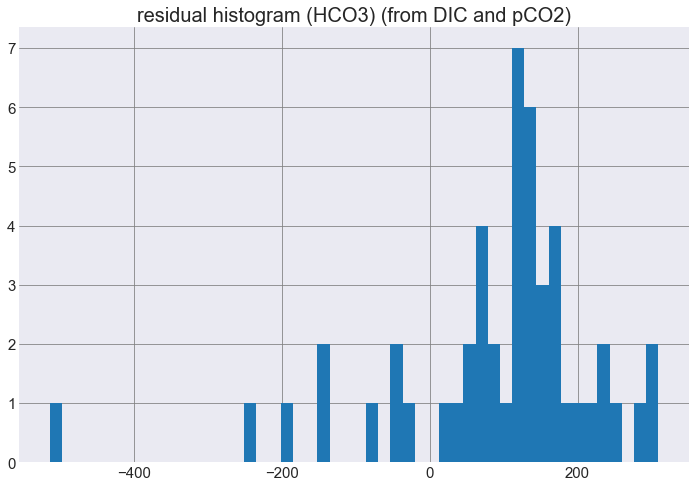

In [32]:
#residual for HCO3_pred
r_HCO3 = data['HCO3'] - results['carbonate']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_HCO3,bins=50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('residual histogram (HCO3) (from DIC and pCO2)', fontsize=20)
plt.grid(color='grey')

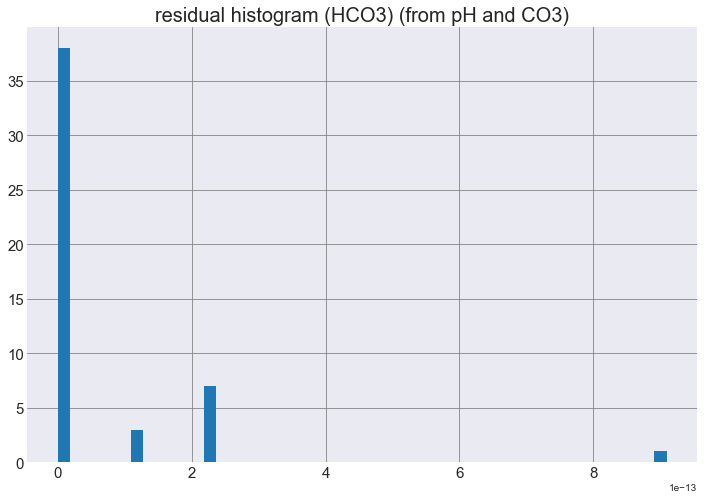

In [33]:
#residual for HCO3_pred
r_HCO3_2 = data['HCO3'] - results4['carbonate']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_HCO3_2,bins=50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('residual histogram (HCO3) (from pH and CO3)', fontsize=20)
plt.grid(color='grey')

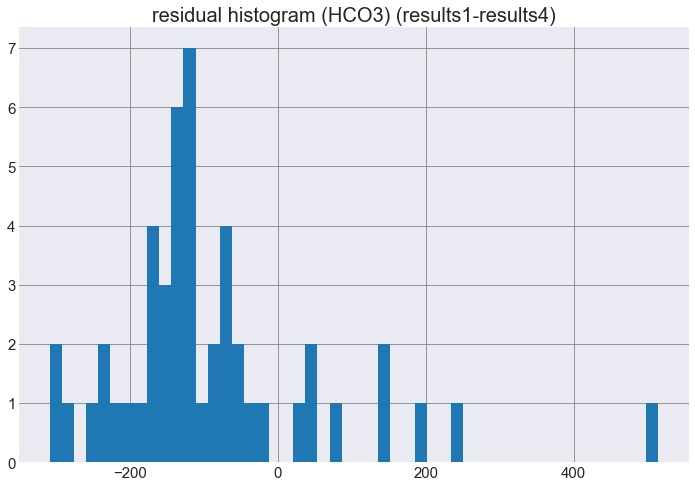

In [34]:
#residual for HCO3_pred
r_HCO3_3 = results['carbonate'] - results4['carbonate']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_HCO3_3,bins=50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('residual histogram (HCO3) (results1-results4)', fontsize=20)
plt.grid(color='grey')

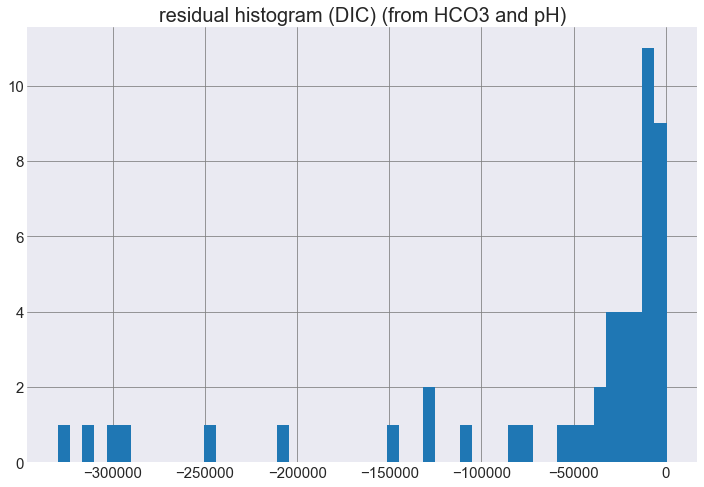

In [35]:
#residual for HCO3_pred
r_DIC = data['DIC_trans'] - results3['dic']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_DIC,bins=50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('residual histogram (DIC) (from HCO3 and pH)', fontsize=20)
plt.grid(color='grey')

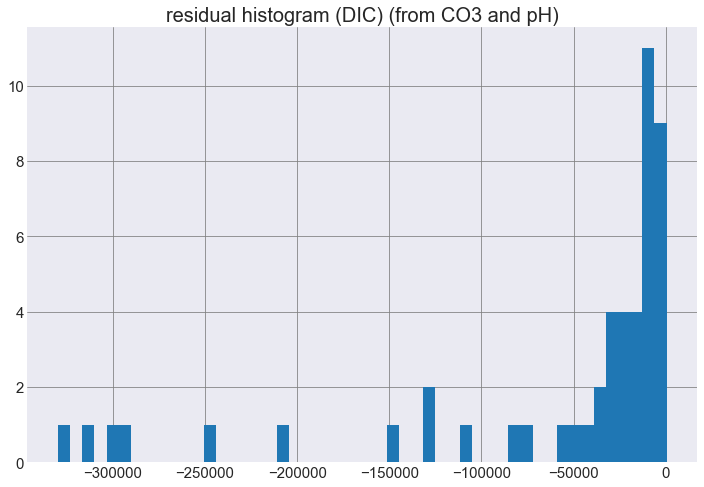

In [36]:
#residual for HCO3_pred
r_DIC_2 = data['DIC_trans'] - results4['dic']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_DIC_2,bins=50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('residual histogram (DIC) (from CO3 and pH)', fontsize=20)
plt.grid(color='grey')

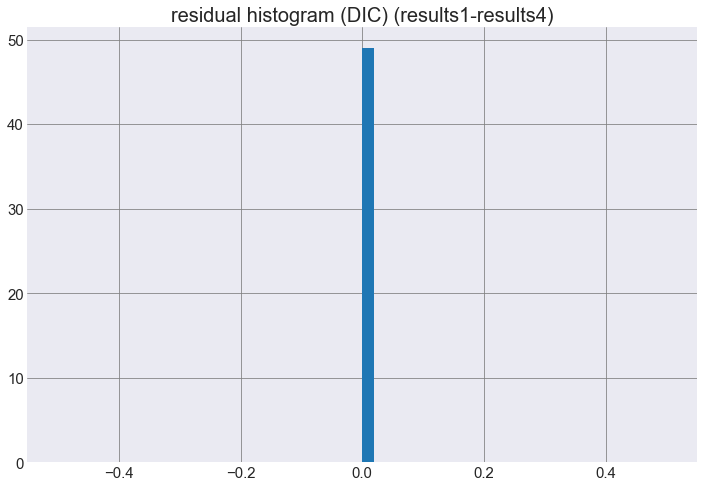

In [37]:
#residual for HCO3_pred
r_DIC_3 = results3['dic'] - results4['dic']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_DIC_3,bins=50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('residual histogram (DIC) (results1-results4)', fontsize=20)
plt.grid(color='grey')